## Problem 1
### Paradoxes in Single Modal Fixed Demand Network (1)
Lecture note 17, page 13

In [68]:
# Import packages
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

Four-link Network

4-link network:


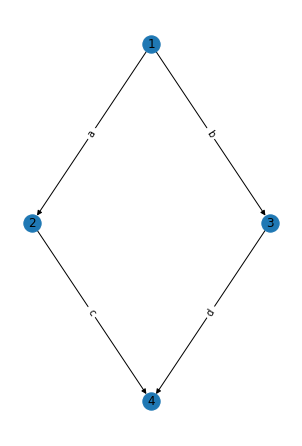

In [69]:
nodes={1:(1,1),2:(0,0),3:(2,0),4:(1,-1)}
links={'a':(1,2),'b':(1,3),'c':(2,4),'d':(3,4)}
# Create the network based on networkx
G=nx.DiGraph()
# Add nodes
for node in nodes.items():
    G.add_node(node[0],pos=node[1])
# Add edges
for i in links.keys():
    G.add_edge(links[i][0],links[i][1],link=i)
# Plot the network
pos=nx.get_node_attributes(G,'pos') # The positions of each node
link_index=nx.get_edge_attributes(G,'link') # The edge index
plt.figure(figsize=(4,6))
nx.draw(G, pos, node_size=300, with_labels=True)
nx.draw_networkx_edge_labels(G, pos,edge_labels=link_index) # Draw the edge labels
print('4-link network:')

In [70]:
# Link travel time function
t_a = lambda x: 10*x
t_b = lambda x: x+50
t_c = lambda x: x+50
t_d = lambda x: 10*x
t_e = lambda x: x+10

# Emission factor
h = 0.1

# Demand from node 1 to node 4
demand = 6

In [71]:
guess = (1,1)
f = lambda f1,f2: np.array([
    f1+f2-demand,
    t_a(f1)+t_c(f1) - (t_b(f2)+t_d(f2))
])
[f1,f2]=opt.least_squares(lambda x: f(x[0],x[1]),x0=guess, bounds=((0,0),(np.inf,np.inf))).x

In [72]:
print('The equilibrium flow on path 1 and 2 is respectively:', f1, 'and', f2)
print('The equilibrium paths time is:', t_a(f1)+t_c(f1))
print('The total emissions are:', np.round(2*h*f1+2*h*f2,1))

The equilibrium flow on path 1 and 2 is respectively: 3.0 and 3.0
The equilibrium paths time is: 83.0
The total emissions are: 1.2


Five-link Network

5-link network:


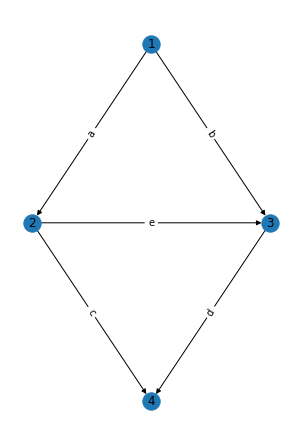

In [73]:
nodes={1:(1,1),2:(0,0),3:(2,0),4:(1,-1)}
links={'a':(1,2),'b':(1,3),'c':(2,4),'d':(3,4),'e':(2,3)}
# Create the network based on networkx
G=nx.DiGraph()
# Add nodes
for node in nodes.items():
    G.add_node(node[0],pos=node[1])
# Add edges
for i in links.keys():
    G.add_edge(links[i][0],links[i][1],link=i)
# Plot the network
pos=nx.get_node_attributes(G,'pos') # The positions of each node
link_index=nx.get_edge_attributes(G,'link') # The edge index
plt.figure(figsize=(4,6))
nx.draw(G, pos, node_size=300, with_labels=True)
nx.draw_networkx_edge_labels(G, pos,edge_labels=link_index) # Draw the edge labels
print('5-link network:')

In [74]:
guess = (1,1,1)
f = lambda f1,f2,f3: np.array([
    f1+f2+f3-demand,
    t_a(f1+f3)+t_c(f1) - (t_b(f2)+t_d(f2+f3)),
    t_a(f1+f3)+t_c(f1) - (t_a(f1+f3)+t_e(f3)+t_d(f2+f3))
])
[f1,f2,f3]=opt.least_squares(lambda x: f(x[0],x[1],x[2]),x0=guess, 
bounds=((0,0,0),(np.inf,np.inf,np.inf))).x

In [75]:
print('The equilibrium flow on path 1 and 2, and 3 is respectively:', 
np.round(f1,1), np.round(f2,1), 'and', np.round(f3,1))
print('The equilibrium paths time is:', np.round(t_a(f1+f3)+t_c(f1),1))
print('The total emissions are:', np.round(2*h*f1+2*h*f2+h*(f1+f2+f3),1))

The equilibrium flow on path 1 and 2, and 3 is respectively: 2.0 2.0 and 2.0
The equilibrium paths time is: 92.0
The total emissions are: 1.4
